In [1]:
import sys
import os
from pathlib import Path

root_dir = Path(os.getcwd())

if str(root_dir.parents[1]) not in sys.path:
  sys.path.append(str(root_dir.parents[1]))

#print(sys.path)

from LMORL.BAN.API.agents.DQNHybrid import DQNHybrid

import mo_gymnasium as mo_gym

env = mo_gym.make("four-room-v0", render_mode="rgb_array")

In [2]:

input_size = env.observation_space.shape[0]
num_actions = int(env.action_space.n)
action_space = list(range(env.action_space.n))
learning_rate = 0.001
epsilon_decay = 0.995
epsilon_min = 0.1
batch_size = 64
train_start = 64
hidden_size = 128
BAN_SIZE = 3
max_memory_size=100000

agent = DQNHybrid(input_size=input_size, num_actions=num_actions,
                  action_space=action_space, learning_rate=learning_rate,
                  epsilon_decay=epsilon_decay, epsilon_min=epsilon_min,
                  batch_size=batch_size, hidden_size=hidden_size,
                  ban_size=BAN_SIZE, max_memory_size=max_memory_size, train_start=train_start)


16:08:26	Episode		timesteps:	200	Took	1.422044 sec - reward:	[1.0, 0.0, 1.0]	


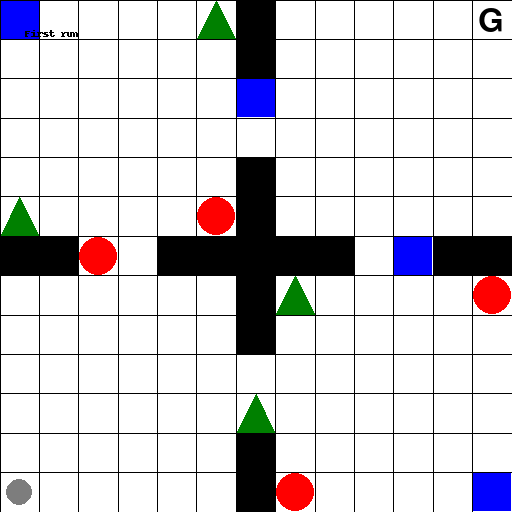

In [3]:
from IPython.display import Image as IpyImg

total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title="First run", render=False)

display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

In [4]:
from IPython.display import Image as IpyImg

EPISODES_PER_ITERATION = 500
REPLAY_FREQUENCY=4
mname = "fooo.model"

def early_stopping(reward : list) -> bool:
    if(sum(reward) > 6):
        return True
    return False

rewards, avg_rewards, timings, infos_lists = agent.learning(env=env,episodes=EPISODES_PER_ITERATION, early_stopping=early_stopping, replay_frequency=REPLAY_FREQUENCY, mname=mname, verbose=True)

title=f"After {(i+1)*EPISODES_PER_ITERATION} episodes"
total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title=title, render=False, verbose=False)
display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

16:08:49	Episode	1	timesteps:	200	Took	20.550711 sec - reward:	[0.0, 0.0, 2.0]	| 100AvgReward: [0.0, 0.0, 2.0]
16:08:51	Episode	2	timesteps:	200	Took	2.251387 sec - reward:	[1.0, 2.0, 1.0]	| 100AvgReward: [0.5, 1.0, 1.5]
16:08:53	Episode	3	timesteps:	200	Took	2.04648 sec - reward:	[0.0, 0.0, 0.0]	| 100AvgReward: [0.3333333333333333, 0.6666666666666666, 1.0]
16:08:56	Episode	4	timesteps:	200	Took	2.083442 sec - reward:	[0.0, 1.0, 0.0]	| 100AvgReward: [0.25, 0.75, 0.75]
16:08:58	Episode	5	timesteps:	200	Took	2.081728 sec - reward:	[2.0, 1.0, 2.0]	| 100AvgReward: [0.6, 0.8, 1.0]
16:09:00	Episode	6	timesteps:	200	Took	2.104332 sec - reward:	[0.0, 0.0, 1.0]	| 100AvgReward: [0.5, 0.6666666666666666, 1.0]
16:09:02	Episode	7	timesteps:	200	Took	2.117132 sec - reward:	[0.0, 1.0, 1.0]	| 100AvgReward: [0.42857142857142855, 0.7142857142857143, 1.0]
16:09:04	Episode	8	timesteps:	200	Took	2.128611 sec - reward:	[1.0, 2.0, 1.0]	| 100AvgReward: [0.5, 0.875, 1.0]
16:09:06	Episode	9	timesteps:	200	Took	

In [ ]:
from LMORL.BAN.API.ban_utils import Ban

%matplotlib inline

r = Ban.display_plot(rewards, len(rewards), "Total rewards")

In [ ]:
r = Ban.display_plot(avg_rewards, len(avg_rewards), "Total AVG rewards")